## 6.9 Adadelta算法
“长江后浪推前浪，一浪更比一浪高”。RMSProp算法对Adagrad算法在学习率上进行了改进。同时期，其他的研究者还提出了不同的改进算法。其中比较典型的就是Adadelta算法啦。在优化算法的发展史上留下了值得炫耀的一笔，本节咱们就来介绍下。

### 6.9.1 基本原理

从时间线上来看，Adagrad算法是由John Duchi、Eliza Singer和Yoshua Bengio在2011年提出的。RMSProp算法是由Geoffrey Hinton在2012年提出的。Adadelta算法是由Matthew D. Zeiler在2012年提出的。基本上是脚前脚后，同一个时期。

Adadelta是一种自适应学习率的方法，用于神经网络的训练过程中。它的基本思想是避免使用手动调整学习率的方法来控制训练过程，而是自动调整学习率，使得训练过程更加顺畅。

Adadelta算法主要由两部分组成：梯度积分和更新规则。

梯度积分：在每一个时刻，我们可以计算出每一层的梯度。梯度积分即是对这些梯度进行累加，并记录下来。

更新规则：我们通过使用梯度积分来更新每一层的权重。我们使用如下公式来计算权重的更新量：

$$\Delta w = -\frac{\sqrt{E[g^2] + \epsilon}}{\sqrt{E[\Delta w^2] + \epsilon}} \cdot g$$

其中，$\Delta w$ 表示权重的更新量，$g$ 表示当前梯度，$E[g^2]$ 表示梯度积分，$E[\Delta w^2]$ 表示权重更新量的积分，$\epsilon$ 是一个很小的正数，用于防止分母为 $0$ 的情况。

我们使用这个公式来计算权重的更新量，并更新权重。这样，我们就实现了使用自适应学习率来训练神经网络的目的。

### 6.9.2 优缺点

从优点来说，Adadelta算法自动调整学习率，使得训练过程更加顺畅。它不需要手动调整学习率，可以省去调参的时间，而且能够在训练过程中避免出现“饱和”现象，使得训练更加稳定。

从缺点来看，它可能会收敛得比较慢，因为它不会显式地调整学习率。此外，它需要维护梯度和权重更新量的积分，可能会增加空间复杂度。

### 6.9.3 代码示例

在下面这个例子中，我们将演示用一个简单的神经网络来拟合 $y = x^2$ 这个函数，选取均方误差作为损失函数，使用Adadelta算法来优化权重。

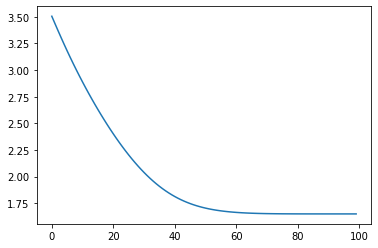

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 定义一个简单的网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# 随机生成训练数据
x = torch.randn(100, 1)
y = x.pow(2) + 0.1 * torch.randn(100, 1)

# 实例化网络
net = Net()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adadelta(net.parameters())

# 记录训练损失
losses = []

# 开始训练
for epoch in range(100):
    # 前向传播 + 反向传播 + 优化
    output = net(x)
    loss = criterion(output, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 记录损失
    losses.append(loss.item())

# 绘制训练损失图
plt.plot(losses)
plt.show()

在训练过程中，每隔一个epoch记录一次损失，最后绘制损失的变化图。可以看到随着训练的进行，损失逐渐减少。这说明网络的权重在逐渐拟合训练数据。

**梗直哥提示：这个例子只是为了给出一个大致的框架，帮助你理解如何使用Adadelta算法来训练一个网络。你可以根据自己的需要来修改代码，例如调整网络的结构、使用不同的数据集等。**

[Next 6-10 Adam算法](./6-10%20Adam算法.ipynb)